In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
data = iris.data  # Only the features, excluding labels
df = pd.DataFrame(data, columns=iris.feature_names)

# Normalize data using Z-score normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)

print("First 5 rows of normalized data:\n", normalized_data[:5])


First 5 rows of normalized data:
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [13]:
z_scores = np.abs((normalized_data - normalized_data.mean(axis=0)) / normalized_data.std(axis=0))
y_pred_z = np.where(np.any(z_scores > 3, axis=1), -1, 1)


In [14]:
from scipy.spatial.distance import mahalanobis

mean = np.mean(normalized_data, axis=0)
cov_matrix = np.cov(normalized_data.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

mahalanobis_distances = [mahalanobis(x, mean, inv_cov_matrix) for x in normalized_data]
threshold = np.percentile(mahalanobis_distances, 95)  # Top 5% are anomalies
y_pred_maha = np.where(mahalanobis_distances > threshold, -1, 1)


In [16]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred_lof = lof.fit_predict(normalized_data)


In [17]:
from sklearn.ensemble import IsolationForest

isof = IsolationForest(contamination=0.05, random_state=42)
y_pred_isof = isof.fit_predict(normalized_data)


In [18]:
from sklearn.svm import OneClassSVM

oc_svm = OneClassSVM(kernel='rbf', nu=0.05)
y_pred_ocsvm = oc_svm.fit_predict(normalized_data)


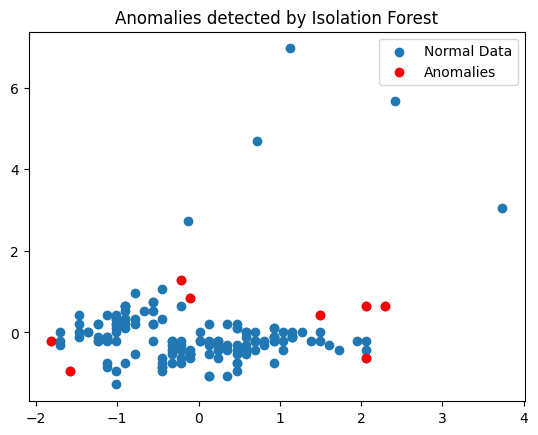

In [19]:
import matplotlib.pyplot as plt

def plot_anomalies(method_name, outliers):
    plt.scatter(normalized_data[:, 0], normalized_data[:, 1], label='Normal Data')
    plt.scatter(normalized_data[outliers, 0], normalized_data[outliers, 1], color='r', label='Anomalies')
    plt.title(f"Anomalies detected by {method_name}")
    plt.legend()
    plt.show()

# Example visualization for Isolation Forest
plot_anomalies("Isolation Forest", outliers_isof[0])


In [20]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the Iris dataset
iris = load_iris()
data = iris.data
df = pd.DataFrame(data, columns=iris.feature_names)

# Inject synthetic anomalies (5 extreme data points)
np.random.seed(42)
outliers = np.random.uniform(low=5, high=10, size=(5, 4))  # Extreme values
data_with_outliers = np.vstack([data, outliers])

# Create ground truth: Normal (1) and Outlier (-1)
y_true = np.ones(len(data_with_outliers))
y_true[-5:] = -1  # Last 5 entries are synthetic outliers

# Normalize the data using Z-score normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_with_outliers)


In [21]:
from sklearn.metrics import classification_report

print("Z-score Classification Report:\n", classification_report(y_true, y_pred_z))
print("Mahalanobis Classification Report:\n", classification_report(y_true, y_pred_maha))
print("LOF Classification Report:\n", classification_report(y_true, y_pred_lof))
print("Isolation Forest Classification Report:\n", classification_report(y_true, y_pred_isof))
print("One-Class SVM Classification Report:\n", classification_report(y_true, y_pred_ocsvm))


Z-score Classification Report:
               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00       150

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155

Mahalanobis Classification Report:
               precision    recall  f1-score   support

        -1.0       0.62      1.00      0.77         5
         1.0       1.00      0.98      0.99       150

    accuracy                           0.98       155
   macro avg       0.81      0.99      0.88       155
weighted avg       0.99      0.98      0.98       155

LOF Classification Report:
               precision    recall  f1-score   support

        -1.0       0.62      1.00      0.77         5
         1.0       1.00      0.98      0.99       150

    accuracy                           0.98       155
   macro avg       0.81      0.9